<a href="https://colab.research.google.com/github/jdre1/Machine-Learning-Bootcamp/blob/main/supervised/01_basic/extracting_featurtes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import plotly as px
import os
import matplotlib.pyplot as plt

In [ ]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source ='stooq')

df_raw = fetch_financial_data()
df_raw.head(25)

,Open,High,Low,Close,Volume
Date,,,,,
2022-03-30,3370.190,3379.010,3310.00,3326.02,2808363
2022-03-29,3407.680,3416.630,3357.37,3386.30,3307680
2022-03-28,3299.500,3380.750,3298.00,3379.81,2992691
2022-03-25,3280.000,3307.370,3245.00,3295.47,2454275
2022-03-24,3274.990,3282.370,3201.00,3272.99,2839903
2022-03-23,3274.100,3327.400,3253.74,3268.16,2790593
2022-03-22,3236.110,3323.340,3233.98,3297.78,3204306
2022-03-21,3222.415,3261.680,3191.06,3229.83,3326876
2022-03-18,3136.260,3231.880,3120.22,3225.01,5148138


##### Plotting excersize by usage Pandas library

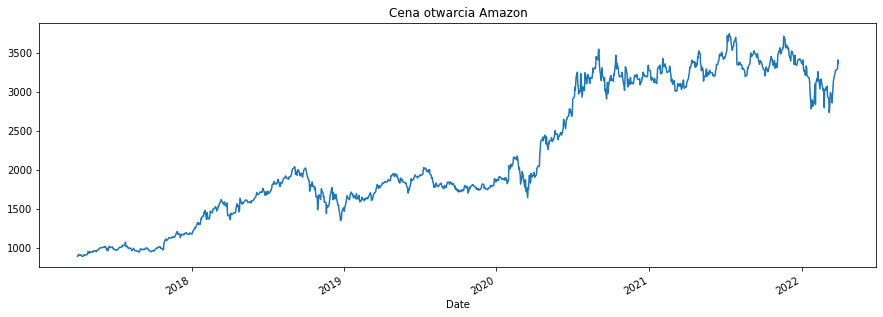

In [ ]:
_ = df_raw.Open.plot(title = 'Cena otwarcia Amazon', figsize = [15,5])



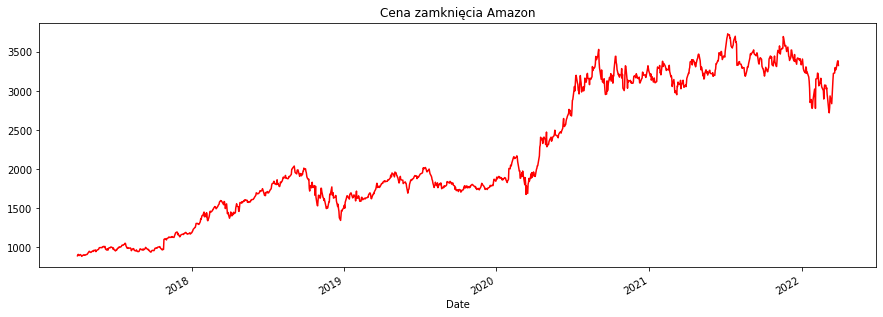

In [ ]:
__ = df_raw.Close.plot(title = 'Cena zamknięcia Amazon', color='red', figsize = [15,5])

In [ ]:
df_raw['Diff'] = ((df_raw['Open'] - df_raw['Close'])/df_raw.Open)*100
df_raw

,Open,High,Low,Close,Volume,Diff
Date,,,,,,
2022-03-30,3370.19,3379.010,3310.000,3326.02,2808363,1.310609
2022-03-29,3407.68,3416.630,3357.370,3386.30,3307680,0.627406
2022-03-28,3299.50,3380.750,3298.000,3379.81,2992691,-2.434005
2022-03-25,3280.00,3307.370,3245.000,3295.47,2454275,-0.471646
2022-03-24,3274.99,3282.370,3201.000,3272.99,2839903,0.061069
...,...,...,...,...,...,...
2017-04-07,899.65,900.090,889.310,894.88,3710922,0.530206
2017-04-06,913.80,917.190,894.493,898.28,6189311,1.698402
2017-04-05,910.82,923.720,905.620,909.28,7396854,0.169078


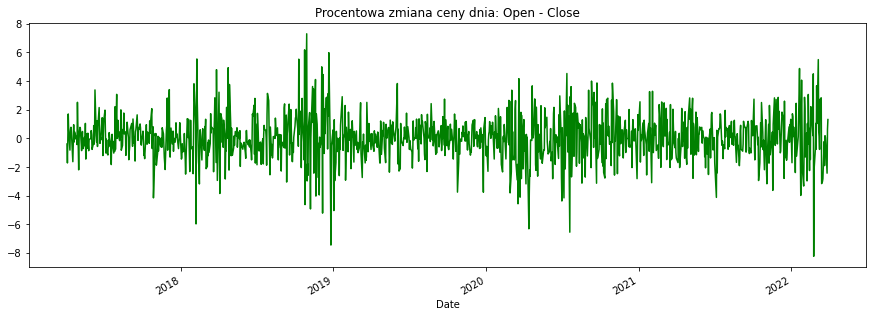

In [ ]:
_ = df_raw['Diff'].plot(title = 'Procentowa zmiana ceny dnia: Open - Close', figsize=[15,5], color='green')

In [ ]:
df_raw['Diff_H_L'] = ((df_raw['High'] - df_raw['Low']))
df_raw

,Open,High,Low,Close,Volume,Diff,Diff_H_L
Date,,,,,,,
2022-03-30,3370.19,3379.010,3310.000,3326.02,2808363,1.310609,69.010
2022-03-29,3407.68,3416.630,3357.370,3386.30,3307680,0.627406,59.260
2022-03-28,3299.50,3380.750,3298.000,3379.81,2992691,-2.434005,82.750
2022-03-25,3280.00,3307.370,3245.000,3295.47,2454275,-0.471646,62.370
2022-03-24,3274.99,3282.370,3201.000,3272.99,2839903,0.061069,81.370
...,...,...,...,...,...,...,...
2017-04-07,899.65,900.090,889.310,894.88,3710922,0.530206,10.780
2017-04-06,913.80,917.190,894.493,898.28,6189311,1.698402,22.697
2017-04-05,910.82,923.720,905.620,909.28,7396854,0.169078,18.100


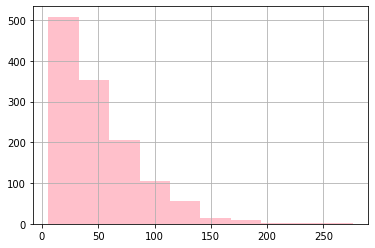

In [ ]:
_ = df_raw['Diff_H_L'].hist(grid=True, color = 'pink')

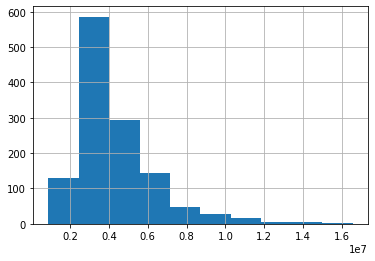

In [ ]:
_ = df_raw.Volume.hist(grid = True)

In [ ]:
data_ = pd.date_range(start='2021-03-30', end='2021-05-31', periods=10)
data_
insert = {'insert':[1,2,4,7,9,4,5,6,10,46]}
df_aw_1 = pd.DataFrame(index=data_)

In [ ]:
df_aw_1 = pd.DataFrame(index=data_, data = insert)
df_aw_1

,insert
2021-03-30 00:00:00,1
2021-04-05 21:20:00,2
2021-04-12 18:40:00,4
2021-04-19 16:00:00,7
2021-04-26 13:20:00,9
2021-05-03 10:40:00,4
2021-05-10 08:00:00,5
2021-05-17 05:20:00,6
2021-05-24 02:40:00,10
2021-05-31 00:00:00,46
